In [43]:
# Module used to connect Python with MongoDb
import pymongo
import sys
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import numpy as np

### Create Database Connection
### Load Data into Database

In [2]:
# The default port used by MongoDB is 27017
mng_client = pymongo.MongoClient('localhost', 27017)

# Replaces the mongo db name
mng_db = mng_client['CO2']

# Replace mongo db collection name
collection_name = 'gas_prices' 
mng_col = mng_db[collection_name]

# Get csv
csv_file_gas_prices = "Data/clean_gas_prices.csv"
data_gp = pd.read_csv(csv_file_gas_prices)
data_gp_json = json.loads(data_gp.to_json(orient='records'))
mng_col.delete_many({})
mng_col.insert_many(data_gp_json)


In [3]:
# Replace mongo db collection name
collection_name = 'emission_data' 
mng_col2 = mng_db[collection_name]

# Get csv
csv_file_emission = "Data/clean_emission_data.csv"
data_ed = pd.read_csv(csv_file_emission)
data_ged_json = json.loads(data_ed.to_json(orient='records'))
mng_col2.delete_many({})
mng_col2.insert_many(data_ged_json)

### Queries

In [4]:
#Get Ontario Data List as DataFrame
collection = mng_db.gas_prices
ont_col = pd.DataFrame(list(mng_db.gas_prices.find({'Province':'Ontario'})))
ont_col

,_id,Year,Province,Price
0,6189d0661a3c99766049dceb,1990,Ontario,57.591667
1,6189d0661a3c99766049dcef,1991,Ontario,56.308333
2,6189d0661a3c99766049dcf3,1992,Ontario,54.825000
3,6189d0661a3c99766049dcf7,1993,Ontario,53.837500
4,6189d0661a3c99766049dcfb,1994,Ontario,53.025000
5,6189d0661a3c99766049dcff,1995,Ontario,54.495833
6,6189d0661a3c99766049dd03,1996,Ontario,58.654167
7,6189d0661a3c99766049dd07,1997,Ontario,59.379167
8,6189d0661a3c99766049dd0b,1998,Ontario,52.820833
9,6189d0661a3c99766049dd0f,1999,Ontario,57.762500


In [5]:
#Get BC Data List as DataFrame
bc_col = pd.DataFrame(list(mng_db.gas_prices.find({'Province':'British Columbia'})))
bc_col

,_id,Year,Province,Price
0,6189d0661a3c99766049dcea,1990,British Columbia,60.766667
1,6189d0661a3c99766049dcee,1991,British Columbia,58.025000
2,6189d0661a3c99766049dcf2,1992,British Columbia,52.970833
3,6189d0661a3c99766049dcf6,1993,British Columbia,52.875000
4,6189d0661a3c99766049dcfa,1994,British Columbia,53.712500
5,6189d0661a3c99766049dcfe,1995,British Columbia,56.641667
6,6189d0661a3c99766049dd02,1996,British Columbia,58.558333
7,6189d0661a3c99766049dd06,1997,British Columbia,58.925000
8,6189d0661a3c99766049dd0a,1998,British Columbia,51.641667
9,6189d0661a3c99766049dd0e,1999,British Columbia,56.762500


In [6]:
#Get Alberta Data List as DataFrame
alb_col = pd.DataFrame(list(mng_db.gas_prices.find({'Province':'Alberta'})))
alb_col

,_id,Year,Province,Price
0,6189d0661a3c99766049dce9,1990,Alberta,53.895833
1,6189d0661a3c99766049dced,1991,Alberta,50.141667
2,6189d0661a3c99766049dcf1,1992,Alberta,47.083333
3,6189d0661a3c99766049dcf5,1993,Alberta,46.500000
4,6189d0661a3c99766049dcf9,1994,Alberta,46.400000
5,6189d0661a3c99766049dcfd,1995,Alberta,48.775000
6,6189d0661a3c99766049dd01,1996,Alberta,50.633333
7,6189d0661a3c99766049dd05,1997,Alberta,52.633333
8,6189d0661a3c99766049dd09,1998,Alberta,47.941667
9,6189d0661a3c99766049dd0d,1999,Alberta,52.016667


In [7]:
#Get Quebec Data List as DataFrame
qc_col = pd.DataFrame(list(mng_db.gas_prices.find({'Province':'Quebec'})))
qc_col

,_id,Year,Province,Price
0,6189d0661a3c99766049dcec,1990,Quebec,62.616667
1,6189d0661a3c99766049dcf0,1991,Quebec,64.279167
2,6189d0661a3c99766049dcf4,1992,Quebec,60.658333
3,6189d0661a3c99766049dcf8,1993,Quebec,58.241667
4,6189d0661a3c99766049dcfc,1994,Quebec,55.941667
5,6189d0661a3c99766049dd00,1995,Quebec,57.495833
6,6189d0661a3c99766049dd04,1996,Quebec,60.604167
7,6189d0661a3c99766049dd08,1997,Quebec,61.629167
8,6189d0661a3c99766049dd0c,1998,Quebec,55.716667
9,6189d0661a3c99766049dd10,1999,Quebec,62.250000


In [8]:
#Get CO2 Emission Data List as DataFrame
em = pd.DataFrame(list(mng_db.emission_data.find()))
em

,_id,Country,Year,CO2
0,6189d0671a3c99766049dd65,Canada,1990,458.007408
1,6189d0671a3c99766049dd66,Canada,1991,449.699173
2,6189d0671a3c99766049dd67,Canada,1992,463.521037
3,6189d0671a3c99766049dd68,Canada,1993,463.993303
4,6189d0671a3c99766049dd69,Canada,1994,478.267071
5,6189d0671a3c99766049dd6a,Canada,1995,490.951380
6,6189d0671a3c99766049dd6b,Canada,1996,506.999620
7,6189d0671a3c99766049dd6c,Canada,1997,521.278446
8,6189d0671a3c99766049dd6d,Canada,1998,528.987104
9,6189d0671a3c99766049dd6e,Canada,1999,543.729999


In [9]:
#Merge Ontario Data to CO2 Emission Data by Year
ont_col_m = ont_col.merge(em, how='inner', on='Year')
ont_col_m.head()

,_id_x,Year,Province,Price,_id_y,Country,CO2
0,6189d0661a3c99766049dceb,1990,Ontario,57.591667,6189d0671a3c99766049dd65,Canada,458.007408
1,6189d0661a3c99766049dcef,1991,Ontario,56.308333,6189d0671a3c99766049dd66,Canada,449.699173
2,6189d0661a3c99766049dcf3,1992,Ontario,54.825000,6189d0671a3c99766049dd67,Canada,463.521037
3,6189d0661a3c99766049dcf7,1993,Ontario,53.837500,6189d0671a3c99766049dd68,Canada,463.993303
4,6189d0661a3c99766049dcfb,1994,Ontario,53.025000,6189d0671a3c99766049dd69,Canada,478.267071


In [10]:
#Removed unnecessary columns
ont_col_m = ont_col_m.drop(labels=['_id_x','_id_y','Country'], axis=1)
ont_col_m.head()

,Year,Province,Price,CO2
0,1990,Ontario,57.591667,458.007408
1,1991,Ontario,56.308333,449.699173
2,1992,Ontario,54.825000,463.521037
3,1993,Ontario,53.837500,463.993303
4,1994,Ontario,53.025000,478.267071


In [11]:
#Merge BC Data to CO2 Emission Data by Year
bc_col_m = bc_col.merge(em, how='inner', on='Year')
bc_col_m.head()

,_id_x,Year,Province,Price,_id_y,Country,CO2
0,6189d0661a3c99766049dcea,1990,British Columbia,60.766667,6189d0671a3c99766049dd65,Canada,458.007408
1,6189d0661a3c99766049dcee,1991,British Columbia,58.025000,6189d0671a3c99766049dd66,Canada,449.699173
2,6189d0661a3c99766049dcf2,1992,British Columbia,52.970833,6189d0671a3c99766049dd67,Canada,463.521037
3,6189d0661a3c99766049dcf6,1993,British Columbia,52.875000,6189d0671a3c99766049dd68,Canada,463.993303
4,6189d0661a3c99766049dcfa,1994,British Columbia,53.712500,6189d0671a3c99766049dd69,Canada,478.267071


In [12]:
#Removed unnecessary columns
bc_col_m = bc_col_m.drop(labels=['_id_x','_id_y','Country'], axis=1)
bc_col_m.head()

,Year,Province,Price,CO2
0,1990,British Columbia,60.766667,458.007408
1,1991,British Columbia,58.025000,449.699173
2,1992,British Columbia,52.970833,463.521037
3,1993,British Columbia,52.875000,463.993303
4,1994,British Columbia,53.712500,478.267071


In [13]:
#Merge Alberta Data to CO2 Emission Data by Year
alb_col_m = alb_col.merge(em, how='inner', on='Year')
alb_col_m.head()

,_id_x,Year,Province,Price,_id_y,Country,CO2
0,6189d0661a3c99766049dce9,1990,Alberta,53.895833,6189d0671a3c99766049dd65,Canada,458.007408
1,6189d0661a3c99766049dced,1991,Alberta,50.141667,6189d0671a3c99766049dd66,Canada,449.699173
2,6189d0661a3c99766049dcf1,1992,Alberta,47.083333,6189d0671a3c99766049dd67,Canada,463.521037
3,6189d0661a3c99766049dcf5,1993,Alberta,46.500000,6189d0671a3c99766049dd68,Canada,463.993303
4,6189d0661a3c99766049dcf9,1994,Alberta,46.400000,6189d0671a3c99766049dd69,Canada,478.267071


In [14]:
#Removed unnecessary columns
alb_col_m = alb_col_m.drop(labels=['_id_x','_id_y','Country'], axis=1)
alb_col_m.head()

,Year,Province,Price,CO2
0,1990,Alberta,53.895833,458.007408
1,1991,Alberta,50.141667,449.699173
2,1992,Alberta,47.083333,463.521037
3,1993,Alberta,46.500000,463.993303
4,1994,Alberta,46.400000,478.267071


In [15]:
#Merge Alberta Data to CO2 Emission Data by Year
qc_col_m = qc_col.merge(em, how='inner', on='Year')
qc_col_m.head()

,_id_x,Year,Province,Price,_id_y,Country,CO2
0,6189d0661a3c99766049dcec,1990,Quebec,62.616667,6189d0671a3c99766049dd65,Canada,458.007408
1,6189d0661a3c99766049dcf0,1991,Quebec,64.279167,6189d0671a3c99766049dd66,Canada,449.699173
2,6189d0661a3c99766049dcf4,1992,Quebec,60.658333,6189d0671a3c99766049dd67,Canada,463.521037
3,6189d0661a3c99766049dcf8,1993,Quebec,58.241667,6189d0671a3c99766049dd68,Canada,463.993303
4,6189d0661a3c99766049dcfc,1994,Quebec,55.941667,6189d0671a3c99766049dd69,Canada,478.267071


In [16]:
#Removed unnecessary columns
qc_col_m = qc_col_m.drop(labels=['_id_x','_id_y','Country'], axis=1)
qc_col_m.head()

,Year,Province,Price,CO2
0,1990,Quebec,62.616667,458.007408
1,1991,Quebec,64.279167,449.699173
2,1992,Quebec,60.658333,463.521037
3,1993,Quebec,58.241667,463.993303
4,1994,Quebec,55.941667,478.267071


In [17]:
#Appending the data
appended_data = ont_col_m.append(bc_col_m)
appended_data.tail()

,Year,Province,Price,CO2
26,2016,British Columbia,114.975000,559.566962
27,2017,British Columbia,130.270833,569.360436
28,2018,British Columbia,146.462500,579.470372
29,2019,British Columbia,145.462500,582.389608
30,2020,British Columbia,124.483333,535.822990


In [18]:
len(appended_data)

62

In [19]:
appended_data = appended_data.append(alb_col_m)
appended_data.tail()

,Year,Province,Price,CO2
26,2016,Alberta,87.954167,559.566962
27,2017,Alberta,99.679167,569.360436
28,2018,Alberta,118.300000,579.470372
29,2019,Alberta,104.166667,582.389608
30,2020,Alberta,92.125000,535.822990


In [20]:
len(appended_data)

93

In [21]:
appended_data = appended_data.append(qc_col_m)
appended_data.tail()

,Year,Province,Price,CO2
26,2016,Quebec,104.912500,559.566962
27,2017,Quebec,115.425000,569.360436
28,2018,Quebec,128.708333,579.470372
29,2019,Quebec,122.504167,582.389608
30,2020,Quebec,104.908333,535.822990


In [22]:
len(appended_data)

124

In [23]:
#Resetting the Index
appended_data.reset_index(inplace=True,drop=True)

In [24]:
appended_data

,Year,Province,Price,CO2
0,1990,Ontario,57.591667,458.007408
1,1991,Ontario,56.308333,449.699173
2,1992,Ontario,54.825000,463.521037
3,1993,Ontario,53.837500,463.993303
4,1994,Ontario,53.025000,478.267071
...,...,...,...,...
119,2016,Quebec,104.912500,559.566962
120,2017,Quebec,115.425000,569.360436
121,2018,Quebec,128.708333,579.470372
122,2019,Quebec,122.504167,582.389608


In [25]:
clean_data = appended_data.copy()

In [26]:
clean_data

,Year,Province,Price,CO2
0,1990,Ontario,57.591667,458.007408
1,1991,Ontario,56.308333,449.699173
2,1992,Ontario,54.825000,463.521037
3,1993,Ontario,53.837500,463.993303
4,1994,Ontario,53.025000,478.267071
...,...,...,...,...
119,2016,Quebec,104.912500,559.566962
120,2017,Quebec,115.425000,569.360436
121,2018,Quebec,128.708333,579.470372
122,2019,Quebec,122.504167,582.389608


### Visualization

Are CO2 emissions relative to gas prices?

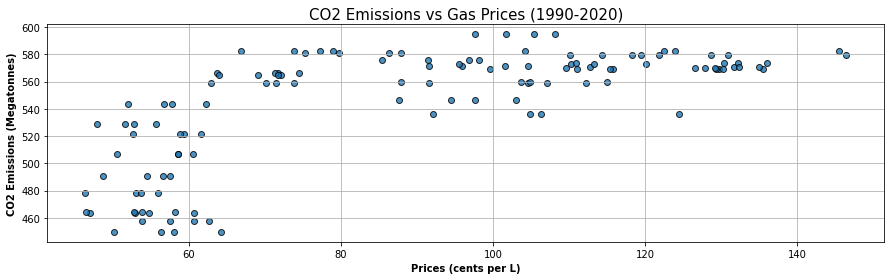

In [29]:
#Plot: CO2 Emissions vs Gas Prices 
fig, ax = plt.subplots(figsize=(15,4))

ax.scatter(clean_data["Price"], clean_data["CO2"], alpha = 0.8, edgecolors="k", linewidth=1)

#Labels
ax.set_title("CO2 Emissions vs Gas Prices (1990-2020)",fontsize=15) 
ax.set_xlabel("Prices (cents per L)", fontweight='bold')
ax.set_ylabel("CO2 Emissions (Megatonnes)", fontweight='bold')
#ax.set_xlim(0, 9)
ax.grid(True)
#ax.xaxis.grid(False, which='minor')
#set the number of minor ticks between the major ticks
#ax.xaxis.set_minor_locator(AutoMinorLocator(10))

#save the figure
#plt.savefig(output_folder + "9_EarthquakeMagnitudeVsPcOceanicEvent.png", facecolor = 'white')
plt.show()

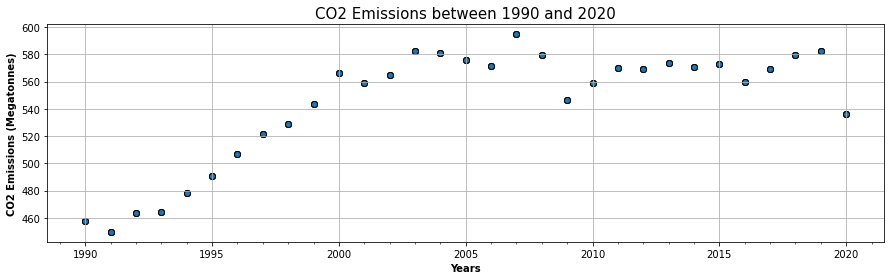

In [33]:
#Plot: CO2 Emissions per Year 
fig, ax = plt.subplots(figsize=(15,4))

ax.scatter(clean_data["Year"], clean_data["CO2"], alpha = 0.8, edgecolors="k", linewidth=1)

#Labels
ax.set_title("CO2 Emissions between 1990 and 2020",fontsize=15) 
ax.set_xlabel("Years", fontweight='bold')
ax.set_ylabel("CO2 Emissions (Megatonnes)", fontweight='bold')
#ax.set_xlim(0, 9)
ax.grid(True)
ax.xaxis.grid(False, which='minor')
#set the number of minor ticks between the major ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))

#save the figure
#plt.savefig(output_folder + "9_EarthquakeMagnitudeVsPcOceanicEvent.png", facecolor = 'white')
plt.show()

In [ ]:
#create a new column
np.seterr(divide='ignore', invalid='ignore')
plt.figure(figsize=(9,5))

# Make a separate list for each magnitude
x9 = list(earthquake_mag[earthquake_mag['Magnitude']>=9]['Alert'])
x8 = list(earthquake_mag[(earthquake_mag['Magnitude']>=8) & (earthquake_mag['Magnitude']<9)]['Alert'])
x7 = list(earthquake_mag[(earthquake_mag['Magnitude']>=7) & (earthquake_mag['Magnitude']<8)]['Alert'])
x6 = list(earthquake_mag[(earthquake_mag['Magnitude']>=6) & (earthquake_mag['Magnitude']<7)]['Alert'])
x5 = list(earthquake_mag[(earthquake_mag['Magnitude']>=5) & (earthquake_mag['Magnitude']<6)]['Alert'])
x4 = list(earthquake_mag[(earthquake_mag['Magnitude']>=4) & (earthquake_mag['Magnitude']<5)]['Alert'])
x3 = list(earthquake_mag[(earthquake_mag['Magnitude']>=3) & (earthquake_mag['Magnitude']<4)]['Alert'])
x2 = list(earthquake_mag[(earthquake_mag['Magnitude']>=2) & (earthquake_mag['Magnitude']<3)]['Alert'])
x1 = list(earthquake_mag[(earthquake_mag['Magnitude']>=1) & (earthquake_mag['Magnitude']<2)]['Alert'])
x0 = list(earthquake_mag[(earthquake_mag['Magnitude']>=0) & (earthquake_mag['Magnitude']<1)]['Alert'])

# Assign colors for each magnitude and the names
colors = ['black', 'olive', 'cyan', 'pink', 'brown', 'green', 'blue', 'orange', 'purple', 'red']
names = ['Mag 0', 'Mag 1', 'Mag 2', 'Mag 3', 'Mag 4','Mag 5', 'Mag 6', 'Mag 7', 'Mag 8', 'Mag 9']

# Define the plot
plt.hist([x0, x1, x2, x3, x4, x5, x6, x7, x8, x9], bins = 4, density=True,
         color = colors, label=names) 

# assign labels
plt.xlabel("Alert Levels", fontsize=14, fontweight='bold')
plt.ylabel("Density", fontsize=14, fontweight='bold')
plt.title("Density Histogram of Earthquake Alert Level Showing Magnitudes",fontsize=14)


plt.xticks(rotation=45)

plt.legend(title='Legend',fancybox=True) 
plt.tight_layout()
#save the figure
plt.savefig(output_folder + "8_DensityHistEQAlertWithMagnitudes.png", facecolor = 'white')

plt.show()

ValueError: color kwarg must have one color per data set. 1 data sets and 4 colors were provided

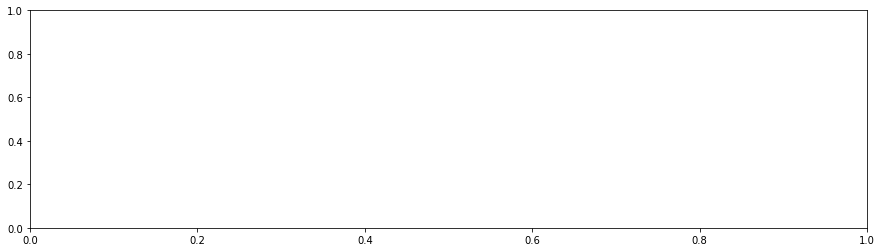

In [36]:
#Plot: CO2 Emissions per Year 
fig, ax = plt.subplots(figsize=(15,4))


x0 = list(clean_data[clean_data['Province']== 'Ontario']['Year'])
x1 = list(clean_data[clean_data['Province']== 'British Columbia']['Year'])
x2 = list(clean_data[clean_data['Province']== 'Alberta']['Year'])
x3 = list(clean_data[clean_data['Province']== 'Quebec']['Year'])

colors = ['blue','green','orange','purple']
names = ['Ontario','British Columbia','Alberta','Quebec']


ax.hist([x0,x1,x2,x3], bins=31, density=True, alpha = 0.8, edgecolors="k", 
           linewidth=1, color=colors, label=names)

#Labels
ax.set_title("Gas Prices between 1990 and 2020",fontsize=15) 
ax.set_xlabel("Years", fontweight='bold')
ax.set_ylabel("Gas Price (Cents per L)", fontweight='bold')
#ax.set_xlim(0, 9)
ax.grid(True)
#ax.xaxis.grid(False, which='minor')
#set the number of minor ticks between the major ticks
#ax.xaxis.set_minor_locator(AutoMinorLocator(10))

plt.legend(title='Legend',fancybox=True) 
plt.tight_layout()

#save the figure
#plt.savefig(output_folder + "9_EarthquakeMagnitudeVsPcOceanicEvent.png", facecolor = 'white')
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

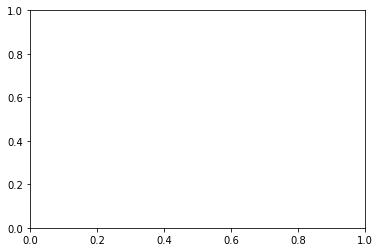

In [48]:
labels = [clean_data['Year'].unique()]

x0 = list(clean_data[clean_data['Province']== 'Ontario']['Price'])
x1 = list(clean_data[clean_data['Province']== 'British Columbia']['Price'])
x2 = list(clean_data[clean_data['Province']== 'Alberta']['Price'])
x3 = list(clean_data[clean_data['Province']== 'Quebec']['Price'])

width = 0.03
x=np.arange(4)

fig, ax = plt.subplots()

ont = ax.bar(x + 0.00, x0, color='b', label='Ontario')
bc = ax.bar(x + 0.25, x1, color='r', label='British Columbia')
alb = ax.bar(x + 0.50, x2, color='g', label='Alberta')
qc = ax.bar(x + 0.75, x3, color='o', label='Quebec')

#Labels
ax.set_title("Gas Prices between 1990 and 2020",fontsize=15) 
ax.set_xlabel("Years", fontweight='bold')
ax.set_ylabel("Gas Price (Cents per L)", fontweight='bold')
ax.legend()

# ax.bar_label(ont, padding=3)
# ax.bar_label(bc, padding=3)
# ax.bar_label(alb, padding=3)
# ax.bar_label(qc, padding=3)

fig.tight_layout()
plt.show()


In [38]:
labels

[array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
        2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
        2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])]